In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import mutual_info_classif

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score


In [2]:
df = pd.read_csv(r"D:\Projects Github\bioinfo-cancer-classification-rnaseq\datasets\cancer_gene_expression.csv")

# Exploration and Cleaning

In [3]:
print(df.head(), df.shape)

   gene_1  gene_2  gene_3  ...  gene_7999  gene_8000  Cancer_Type
0     0.0     0.0     0.0  ...   6.928584   2.088413         KIRC
1     0.0     0.0     0.0  ...   5.039231   2.448002         KIRC
2     0.0     0.0     0.0  ...   3.119738   4.433988         BRCA
3     0.0     0.0     0.0  ...   2.863046   3.380342         KIRC
4     0.0     0.0     0.0  ...   6.544487   0.839395         COAD

[5 rows x 8001 columns] (801, 8001)


In [4]:
print(df.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [ ]:
print(df.columns[-1]) # label/type

Cancer_Type


In [9]:
# Check missing values:

null = df.isnull().sum()
g = [i for i in null if i > 0]
print("Columns with missing values: %d" %len(g))
print(len(g))

Columns with missing values: 0
0


In [10]:
# number of types of labels/CANCER type:

print(df['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [15]:
abbr = {"BRCA" : 'Breast Carcinoma', 'KIRC': "Kidney Renal Clear Cell Carcinoma",
        "LUAD": "Lung Adenocarcinoma", "PRAD":"Prostate adenocarcinoma", "COAD": "colon adenocarcinoma"}

In [16]:
abbr

{'BRCA': 'Breast Carcinoma',
 'KIRC': 'Kidney Renal Clear Cell Carcinoma',
 'LUAD': 'Lung Adenocarcinoma',
 'PRAD': 'Prostate adenocarcinoma',
 'COAD': 'colon adenocarcinoma'}

In [17]:
for key, value in abbr.items():
    print(f"{key}: {value}")

BRCA: Breast Carcinoma
KIRC: Kidney Renal Clear Cell Carcinoma
LUAD: Lung Adenocarcinoma
PRAD: Prostate adenocarcinoma
COAD: colon adenocarcinoma


In [18]:
abbr['BRCA']

'Breast Carcinoma'

<Axes: xlabel='Cancer_Type'>

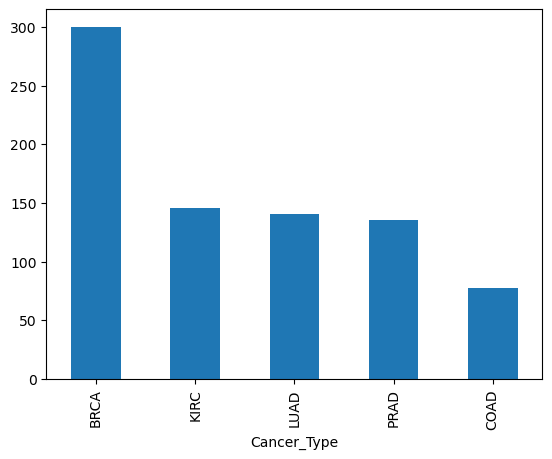

In [19]:
# class distribution:

df['Cancer_Type'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

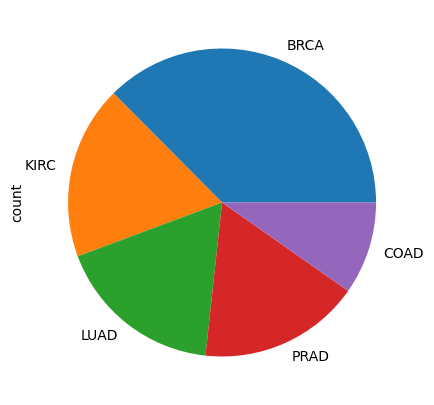

In [25]:
df['Cancer_Type'].value_counts().plot(kind = 'pie', figsize=(5,5))

In [34]:
df.describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,gene_40,...,gene_7961,gene_7962,gene_7963,gene_7964,gene_7965,gene_7966,gene_7967,gene_7968,gene_7969,gene_7970,gene_7971,gene_7972,gene_7973,gene_7974,gene_7975,gene_7976,gene_7977,gene_7978,gene_7979,gene_7980,gene_7981,gene_7982,gene_7983,gene_7984,gene_7985,gene_7986,gene_7987,gene_7988,gene_7989,gene_7990,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364,0.008869,5.106605,0.320329,0.004441,0.091698,0.275483,0.185029,0.013630,7.173790,0.202349,2.725784,0.066991,0.016508,0.136169,0.016971,0.034843,0.016393,5.371075,0.001214,0.0,0.046908,0.029380,1.626199,3.290944,0.024722,0.088067,0.062988,0.009827,0.037118,0.007106,...,8.627485,3.346318,0.674739,9.059691,9.475596,1.943175,8.643870,10.134408,5.882938,1.372209,1.019058,6.438879,6.031472,8.811576,8.471054,0.553451,10.668904,8.689186,9.836635,7.395465,5.005460,5.984185,9.095489,6.352266,8.553762,5.712312,0.678203,7.472208,9.637152,9.062603,6.737536,11.606781,8.284388,5.056489,6.681599,11.567069,7.644004,10.299866,6.212981,2.418248
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010,0.070115,1.031530,0.503595,0.049184,0.262499,0.751911,0.351423,0.161783,0.714393,0.344268,1.876916,0.387919,0.110728,0.468463,0.134133,0.153731,0.129811,0.633441,0.024540,0.0,0.281751,0.166354,1.631314,0.773007,0.146545,0.478511,0.219024,0.078129,0.242231,0.083095,...,0.745408,2.229508,0.889831,0.630980,0.504389,1.974385,0.487084,0.626369,1.390480,1.016097,1.051095,1.419382,0.643518,0.935628,0.380214,1.004177,0.592966,0.718964,0.546189,0.647818,1.725345,1.095394,0.393538,1.897426,1.760012,1.384602,1.120821,1.242233,0.520223,0.487556,1.152086,0.536356,0.996495,1.907506,0.481615,0.332096,0.646763,0.443605,1.425559,1.510189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.413648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.788393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.786387,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.654464,7.404000,0.000000,6.745305,6.810212,2.216610,0.000000,0.000000,1.509037,3.488194,5.092681,7.137719,0.000000,8.093687,3.468727,8.408381,4.961873,1.013141,2.053667,8.104153,0.451435,1.243182,0.806118,0.000000,0.751549,7.835735,6.467671,2.711275,9.227476,4.256037,0.000000,4.753610,10.245493,5.833191,8.850653,0.713256,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214,0.000000,4.483938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.715838,0.000000,1.277806,0.000000,0.000000,0.000000,0.0

BRCA is more than other 4. There is uneven class distribution. Class imbalance has to be dealt with.

# Data Preprocessing

In [26]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [27]:
print(X.shape, y.shape)

(801, 8000) (801,)


## Label Encoding

In [28]:
abbr

{'BRCA': 'Breast Carcinoma',
 'KIRC': 'Kidney Renal Clear Cell Carcinoma',
 'LUAD': 'Lung Adenocarcinoma',
 'PRAD': 'Prostate adenocarcinoma',
 'COAD': 'colon adenocarcinoma'}

In [29]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

labels = label_encoder.classes_
classes = np.unique(y_encoded)

In [30]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [31]:
classes

array([0, 1, 2, 3, 4])

## Data Splitting

In [32]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Data Normalization/Scaling

In [33]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [36]:
print(type(X_train), type(X_train_norm))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [43]:
X_train

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,gene_40,...,gene_7961,gene_7962,gene_7963,gene_7964,gene_7965,gene_7966,gene_7967,gene_7968,gene_7969,gene_7970,gene_7971,gene_7972,gene_7973,gene_7974,gene_7975,gene_7976,gene_7977,gene_7978,gene_7979,gene_7980,gene_7981,gene_7982,gene_7983,gene_7984,gene_7985,gene_7986,gene_7987,gene_7988,gene_7989,gene_7990,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
616,0.000000,0.000000,0.0,2.181643,0.0,0.913952,0.0,0.0,0.000000,2.845831,0.000000,5.633126,1.868884,0.0,0.000000,2.656496,0.000000,0.0,5.869657,1.868884,4.223693,0.0,0.000000,0.000000,0.000000,0.000000,0.0,5.411294,0.0,0.0,0.0,0.0,0.913952,3.163112,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,7.509822,4.530089,3.298908,8.223838,9.628356,7.693571,8.975931,10.280945,3.920941,0.000000,2.181643,7.307274,5.974807,8.802914,8.314778,0.000000,10.192145,8.723664,9.577508,7.307274,9.718932,5.498529,9.091835,7.530664,10.167957,5.286123,0.000000,7.052481,9.495058,9.390605,6.164583,11.978210,8.022717,5.912640,6.439038,11.311311,6.631442,9.911364,7.942022,1.868884
329,0.000000,1.002954,0.0,2.879569,0.0,0.000000,0.0,0.0,0.000000,0.739330,0.000000,5.240963,0.000000,0.0,0.000000,0.000000,0.416516,0.0,7.107395,0.739330,1.002954,0.0,0.000000,0.000000,0.416516,0.000000,0.0,4.706116,0.0,0.0,0.0,0.0,2.419835,2.741985,0.000000,0.000000,0.416516,0.0,0.0,0.0,...,7.291272,3.005166,0.739330,9.651554,9.519622,0.000000,8.621825,9.819143,4.813047,0.739330,0.000000,6.057476,5.983089,9.495074,8.725847,0.000000,11.595710,8.846142,9.898187,7.057526,6.644883,7.776262,8.726988,4.928541,9.928729,6.013306,0.000000,7.476187,10.116604,8.600835,5.170714,11.612615,6.855516,3.327242,6.778445,11.909657,7.518936,10.342030,5.005719,0.416516
342,0.000000,0.000000,0.0,2.431543,0.0,0.000000,0.0,0.0,1.301529,1.301529,0.000000,6.185464,0.450169,0.0,0.000000,0.000000,0.450169,0.0,6.694072,0.000000,4.215578,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.715311,0.0,0.0,0.0,0.0,1.501363,3.538600,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,7.157125,1.974456,0.792772,9.443132,9.789635,1.501363,8.575229,10.461336,4.325070,2.330128,0.675274,8.405244,6.192705,9.243174,8.652415,0.000000,11.290940,9.410896,9.599779,6.848761,4.989262,7.432609,8.669385,8.510404,9.647331,5.341705,1.069496,8.911344,10.237174,8.884766,8.348458,11.421492,7.999386,7.061485,7.065432,11.616668,7.737477,10.092242,7.395440,3.395310
394,0.000000,0.000000,0.0,1.662661,0.0,0.000000,0.0,0.0,1.058663,1.392043,0.000000,5.636207,0.000000,0.0,0.857822,0.857822,0.000000,0.0,7.131003,0.000000,2.414704,0.0,0.000000,1.234992,0.000000,0.000000,0.0,5.513311,0.0,0.0,0.0,0.0,2.087123,1.992152,0.000000,0.000000,0.345737,0.0,0.0,0.0,...,9.243493,4.852378,1.533713,9.650178,8.941356,0.000000,9.328576,9.736963,6.157769,0.345737,0.345737,8.370897,5.933273,8.700665,9.269042,0.000000,9.996812,9.482298,9.207605,6.862216,6.687537,4.174526,9.745178,3.425876,6.385082,4.431442,0.000000,7.471927,10.406705,9.349087,6.171653,11.460277,8.354285,5.053967,6.113323,11.211055,7.961629,11.344124,6.232400,1.234992
79,0.000000,0.000000,0.0,4.292635,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.866987,0.000000,0.0,0.000000,0.000000,0.000000,0.0,7.658219,0.000000,6.194680,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.620891,0.0,0.0,0.0,0.0,0.778461,3.461306,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,8.770241,1.653473,0.778461,9.046843,9.273856,0.000000,8.276185,10.090655,5.143018,0.000000,0.000000,3.637483,5.569704,7.998021,8.477791,0.000000,10.966505,8.631414,9.651572,6.833130,4.662234,5.113513,8.782012,6.877683,10.788335,6.341886,0.000000,6.107567,9.823151,8.262809,2.894876,11.370099,9.164809,6.912362,6.061955,11.744674,6.463810,10.079258,4.741526,2.7

In [ ]:
X_train.iloc[0, 3] #iloc works only with DF

2.18164326123

In [39]:
X_train_norm[0,3]

0.4671305057022768

In [42]:
X_train_norm

array([[0.        , 0.        , 0.        , ..., 0.25369517, 0.74064352,
        0.19190747],
       [0.        , 0.15254052, 0.        , ..., 0.35669972, 0.43979635,
        0.04277014],
       [0.        , 0.        , 0.        , ..., 0.29695667, 0.68464193,
        0.34864934],
       ...,
       [0.        , 0.0492431 , 0.        , ..., 0.69366555, 0.58498185,
        0.17526558],
       [0.        , 0.        , 0.        , ..., 0.29061149, 0.40780918,
        0.19943547],
       [0.24511331, 0.        , 0.        , ..., 0.32058538, 0.54479425,
        0.24575242]])

# Feature Selection

MUTUAL INFORMATION Algorithm helps us to choose top n features from the 8000 features of gene expressions

In [44]:
MI = mutual_info_classif(X_train_norm, y_train)


In [45]:
type(MI)

numpy.ndarray

In [46]:
MI.shape

(8000,)

We have 8000 features because there are 8000 gene expression values. This is arranged in the order of how features are in X_train. We need to select top 300.

In [47]:
MI[0:5]

array([0.009896  , 0.06818021, 0.        , 0.05237047, 0.07698362])

In [48]:
features = X_train.columns

In [49]:
features.shape

(8000,)

In [50]:
features[0:5]

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')

In [51]:
n_features = 300
selected_scores_indices = np.argsort(MI)[::-1][0:n_features]

np.argsort(MI)
→ Returns indices that would sort MI ascending

[::-1]
→ Reverses it to descending order

[0:n_features]
→ Takes the first n_features indices



In [52]:
X_train_selected = X_train_norm[:, selected_scores_indices]
X_test_selected = X_test_norm[:, selected_scores_indices]

In [53]:
X_train_selected.shape

(640, 300)

In [54]:
X_test_selected.shape

(161, 300)

# Classification

### Random Forest: 

RF is particularly good for multiclass data with high dimensionality

In [55]:
model = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))

You're creating a multi-label classifier using One-vs-Rest strategy with a RandomForestClassifier inside.

What it does:
OneVsRestClassifier(...): Wraps a base classifier to handle multi-label or multi-class problems by training one classifier per class.

RandomForestClassifier(...): The base classifier.

max_features=0.2: Each tree in the forest considers 20% of features at each split.



In [56]:
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
pred_prob = model.predict_proba(X_test_selected)

In [58]:
pred_prob

array([[0.47169811, 0.03144654, 0.22012579, 0.11320755, 0.16352201],
       [0.15625   , 0.0390625 , 0.625     , 0.03125   , 0.1484375 ],
       [0.07194245, 0.01438849, 0.25179856, 0.1294964 , 0.5323741 ],
       [0.12318841, 0.10869565, 0.60869565, 0.0942029 , 0.06521739],
       [0.18656716, 0.49253731, 0.20149254, 0.08208955, 0.03731343],
       [0.1746988 , 0.38554217, 0.13855422, 0.15662651, 0.14457831],
       [0.20645161, 0.19354839, 0.19354839, 0.33548387, 0.07096774],
       [0.22834646, 0.45669291, 0.1023622 , 0.13385827, 0.07874016],
       [0.25      , 0.04166667, 0.19444444, 0.09027778, 0.42361111],
       [0.69306931, 0.00990099, 0.12871287, 0.10891089, 0.05940594],
       [0.51369863, 0.05479452, 0.1369863 , 0.19863014, 0.09589041],
       [0.5530303 , 0.02272727, 0.18181818, 0.0530303 , 0.18939394],
       [0.63114754, 0.02459016, 0.19672131, 0.05737705, 0.09016393],
       [0.20529801, 0.17218543, 0.28476821, 0.11258278, 0.22516556],
       [0.47619048, 0.08163265, 0.

# Evaluation 

Accuracy

Precision

Recall

F1 Score

Confusion Matrix

ROC AUC Curve

In [72]:
accuracy = np.round(balanced_accuracy_score(y_test, y_pred), 4)
print("Accuracy:", accuracy)

Accuracy: 0.9583


In [70]:
precision = np.round(precision_score(y_test, y_pred, average='weighted'), 4)
print("Precision:", precision)

Precision: 0.9758


In [74]:
recall = np.round(recall_score(y_test, y_pred, average='weighted'), 4)
print("Recall:", recall)

Recall: 0.9752


In [75]:
f1 = np.round(f1_score(y_test, y_pred, average='weighted'), 4)
print("F1-Score:", f1_score)

F1-Score: <function f1_score at 0x00000172953D1C60>


In [78]:
report = classification_report(y_test, y_pred, target_names=labels)
print("\n")
print("Classification Report: ")
print("\n")
print(report)



Classification Report: 


              precision    recall  f1-score   support

        BRCA       0.95      1.00      0.98        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.96      0.92      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.96      0.97       161
weighted avg       0.98      0.98      0.97       161



1 means its performing too good. Probably OVERFITTING. This is expected for other cancers than BRCA due to less data points. 

In [79]:
# CONFUSION MATRIX:

matrix = confusion_matrix(y_test, y_pred)
matrix_df =pd.DataFrame(matrix, index = labels, columns = labels)
matrix_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,1,14,0,1,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


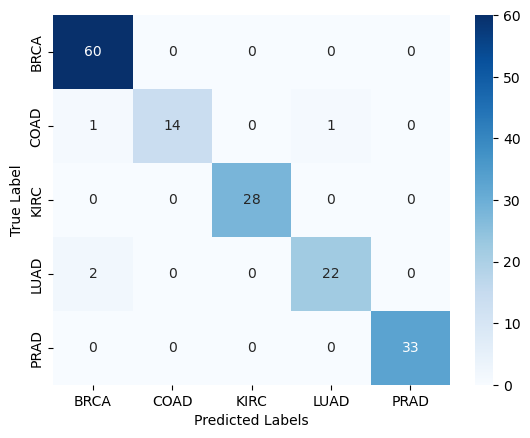

In [85]:
sns.heatmap(matrix_df, annot=True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.show()

In [87]:
pred_prob.shape

(161, 5)

In [88]:
y_pred.shape

(161,)

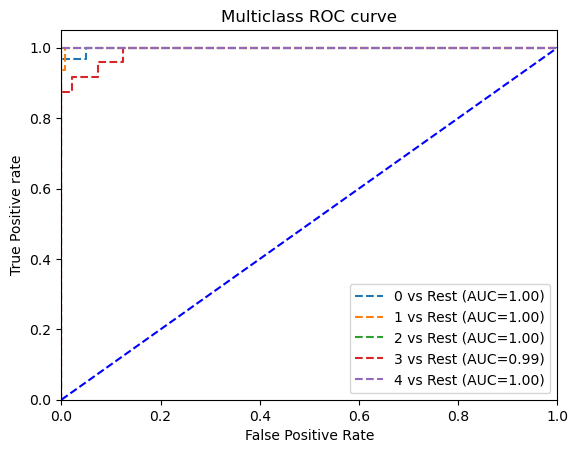

In [89]:
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

We cannot directly plot ROC for multiclass like binary — because ROC is inherently binary.

Each class has its own ROC curve

So fpr[0], fpr[1], ... etc. hold values for class 0, 1, ...

You can use a list instead of a dict, but the logic is the same — loop over classes and store their individual curves.